In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('wine_quality.csv')

In [82]:
#Para saber o número de linhas e colunas
df.shape 

(1143, 13)

In [83]:
#retorna os tipos de dados
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [84]:
#dados nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [85]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [86]:
#Primeiro ponto é buscar as medidas descritivas e avaliar se existe uma discrepância em dados num primeiro momento

df_desc = df.describe()
df_desc

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [87]:
#IQR = Q3 - Q1
df_desc.loc["IQR"] = df_desc.loc['75%'] - df_desc.loc['25%']

df_desc


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000
IQR,2.000000,0.247500,0.330000,0.700000,0.020000,14.000000,40.000000,0.002275,0.195000,0.180000,1.600000,1.000000,798.500000


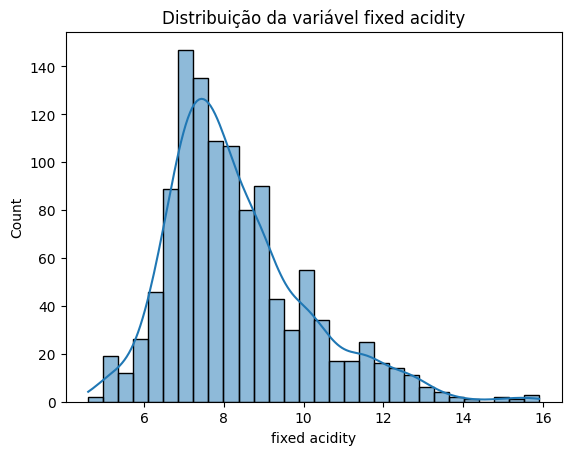

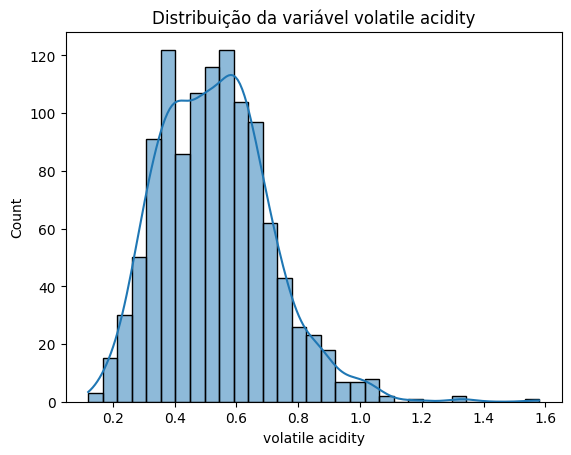

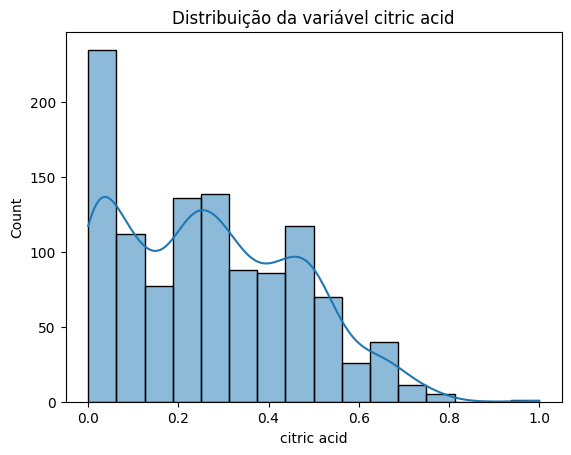

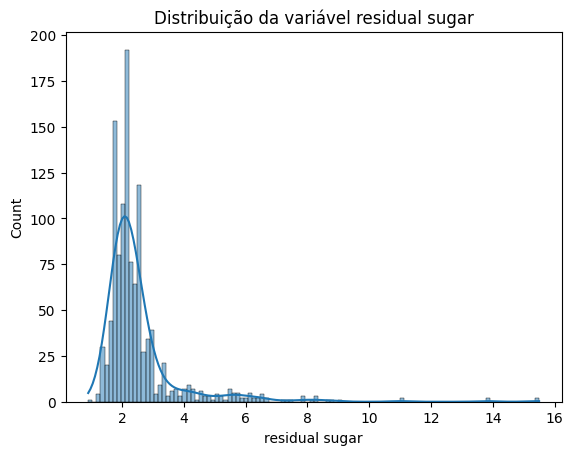

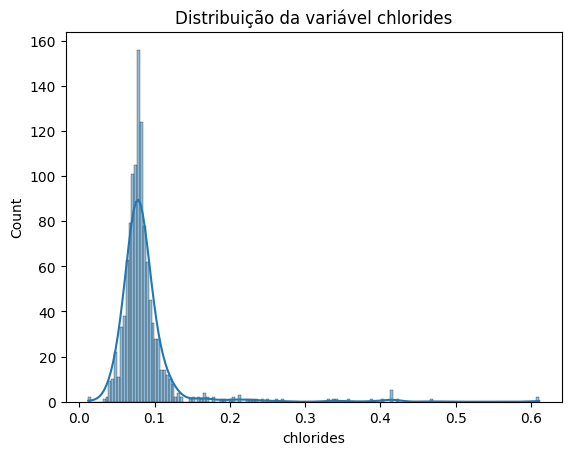

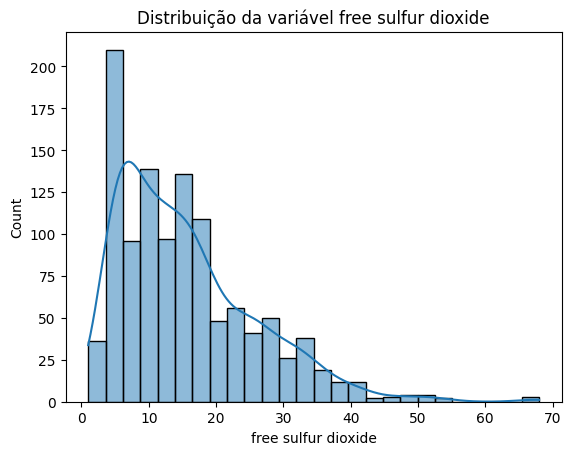

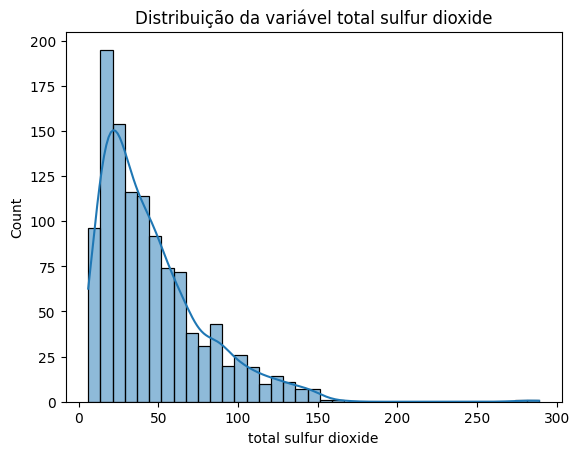

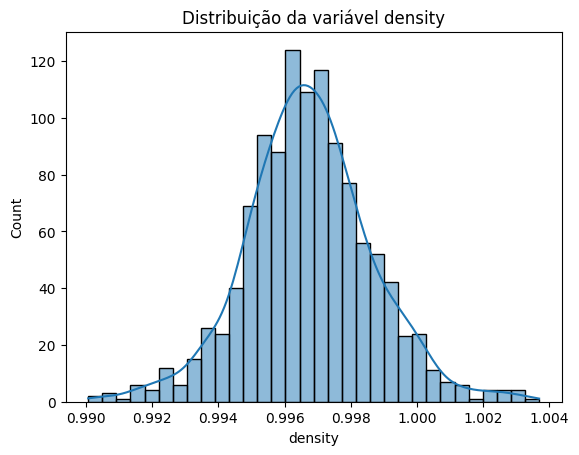

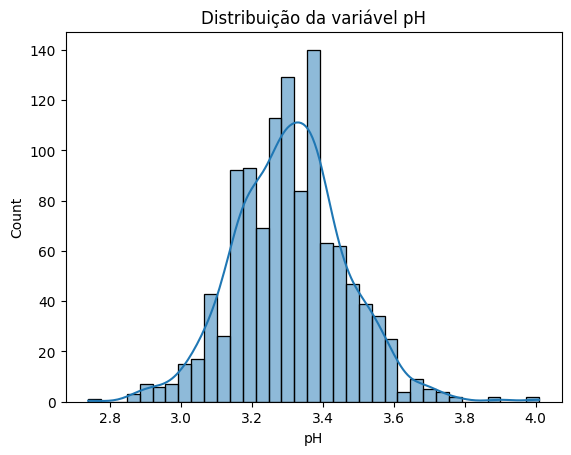

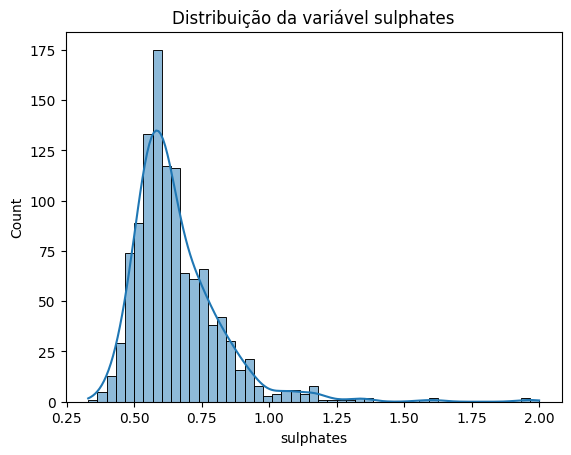

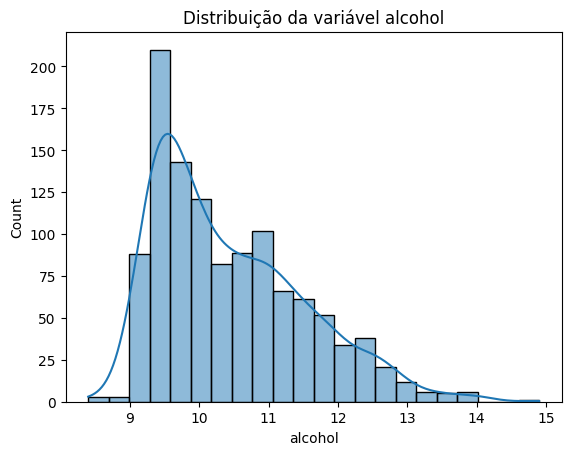

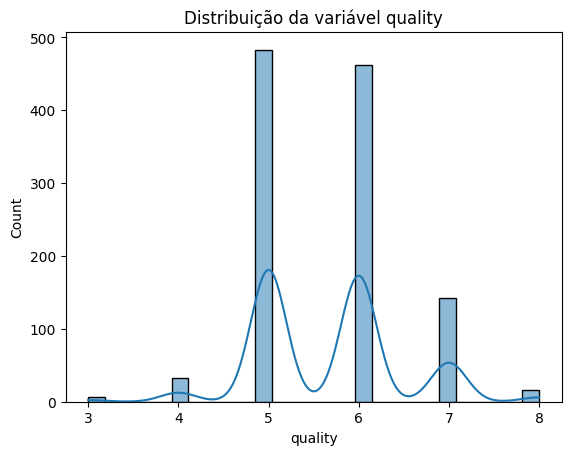

In [88]:
#visualizando distribuições com histogramas para ter intuição quanto a outliers
for col in df.drop(columns='Id'):
    
    sns.histplot(data=df, x=col, kde=True).set_title(f"Distribuição da variável {col}")
    plt.show()


In [89]:
#Método do quartil para identificar os outliers por categoria
columns_to_drop = ['quality', 'Id']
for col in df.drop(columns=columns_to_drop).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    aux_outliers = df[(df[col] < Q1-(IQR*1.5)) | (df[col] > Q3+(IQR*1.5))]

    indice_outliers = aux_outliers.index.tolist()

    if len(indice_outliers) > 1:
        print(f'A coluna {col} tem {len(indice_outliers)} outliers')
        print('\n os índices deles são: \n')
        print(indice_outliers)

    else:
        print(f'A coluna {col} não possui outliers')

    print()
    print("-"*80)
    print()


A coluna fixed acidity tem 44 outliers

 os índices deles são: 

[145, 146, 170, 171, 188, 211, 234, 240, 244, 248, 254, 258, 259, 260, 272, 279, 284, 301, 304, 306, 310, 311, 313, 332, 334, 361, 367, 382, 388, 392, 397, 399, 400, 401, 404, 405, 415, 416, 425, 433, 462, 584, 586, 864]

--------------------------------------------------------------------------------

A coluna volatile acidity tem 14 outliers

 os índices deles são: 

[66, 83, 87, 88, 92, 142, 396, 497, 502, 506, 891, 922, 931, 1044]

--------------------------------------------------------------------------------

A coluna citric acid não possui outliers

--------------------------------------------------------------------------------

A coluna residual sugar tem 110 outliers

 os índices deles são: 

[25, 28, 45, 46, 106, 107, 108, 114, 115, 152, 192, 193, 194, 196, 197, 198, 201, 230, 231, 233, 248, 259, 260, 267, 274, 275, 278, 284, 287, 289, 311, 321, 339, 348, 355, 356, 366, 367, 382, 383, 385, 397, 398, 399, 400, 

In [90]:
df['quality'].value_counts(normalize=True) #entrega os dandos em porcentagem 

quality
5    0.422572
6    0.404199
7    0.125109
4    0.028871
8    0.013998
3    0.005249
Name: proportion, dtype: float64

count    1143.000000
mean        5.657043
std         0.805824
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

<Axes: xlabel='quality', ylabel='Count'>

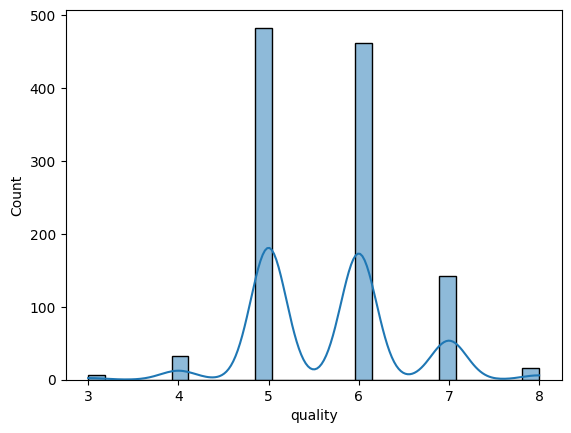

In [91]:
display(df['quality'].describe()) #rodando as variáveis descritivas apenas de qualidade

sns.histplot(data=df, x='quality', kde=True) #histograma com curva de densidade para qualidade

In [92]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


<Axes: >

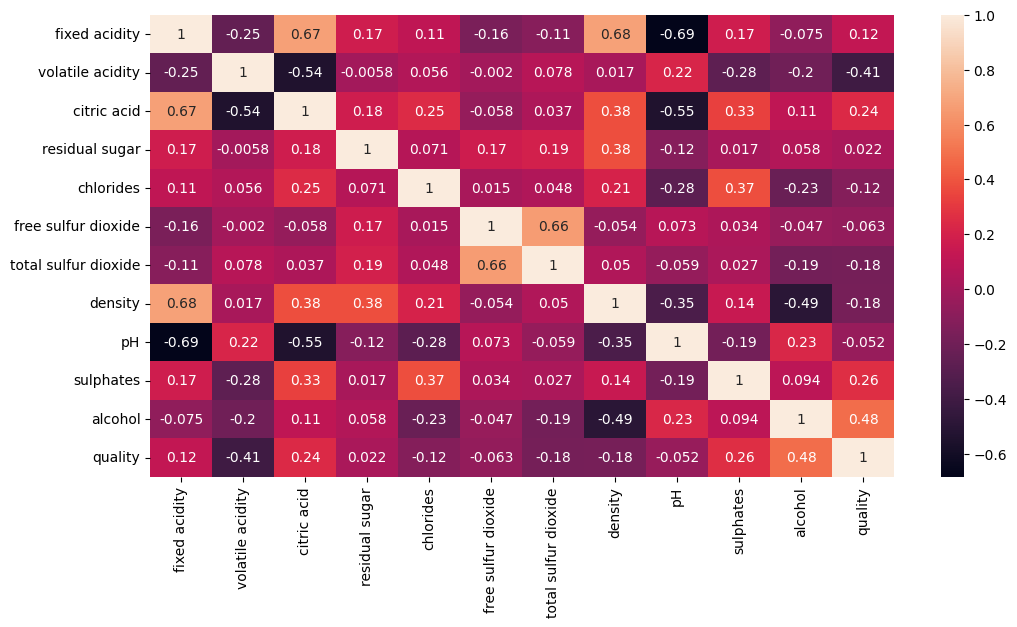

In [93]:
plt.figure(figsize=(12, 6))
df_filtered = df.drop(columns='Id')
sns.heatmap(df_filtered.corr(), annot=True)

In [94]:
df_filtered.corr()['quality'].sort_values() #O objetivo é calcular a correlação de todas as colunas do DataFrame filtrado com a coluna 'quality' e ordenar essas correlações em ordem crescente

volatile acidity       -0.407394
total sulfur dioxide   -0.183339
density                -0.175208
chlorides              -0.124085
free sulfur dioxide    -0.063260
pH                     -0.052453
residual sugar          0.022002
fixed acidity           0.121970
citric acid             0.240821
sulphates               0.257710
alcohol                 0.484866
quality                 1.000000
Name: quality, dtype: float64

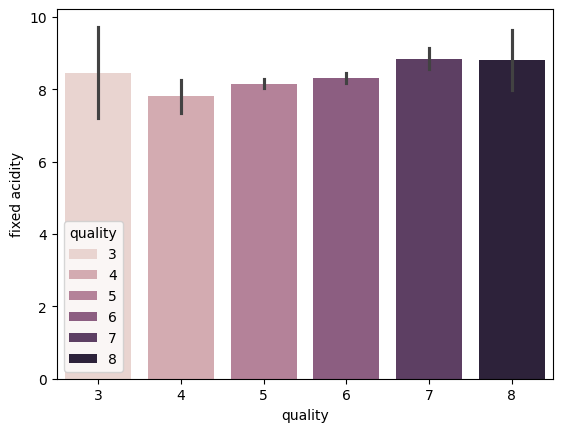

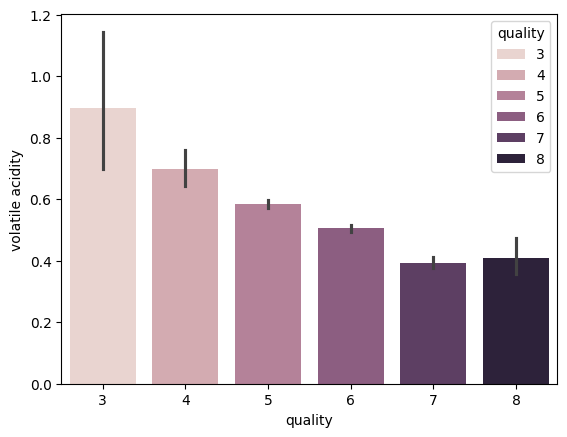

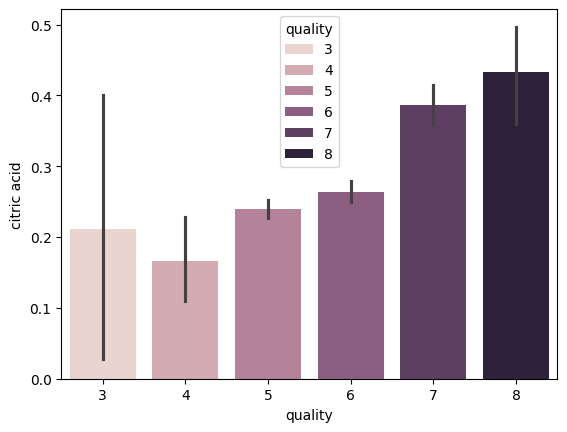

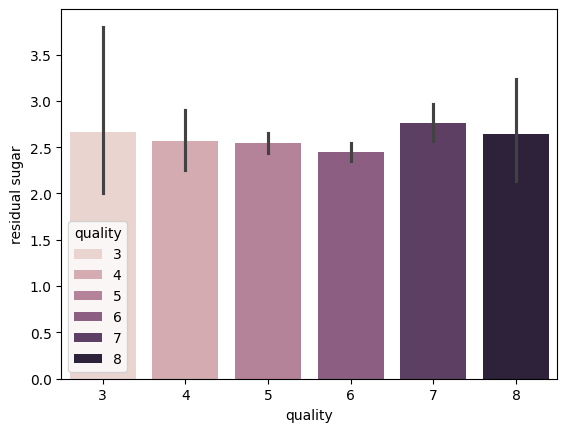

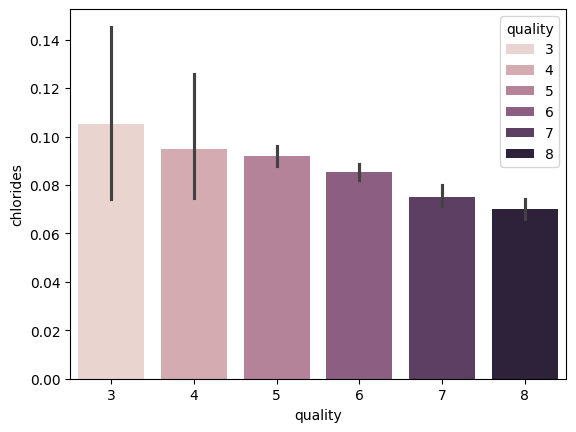

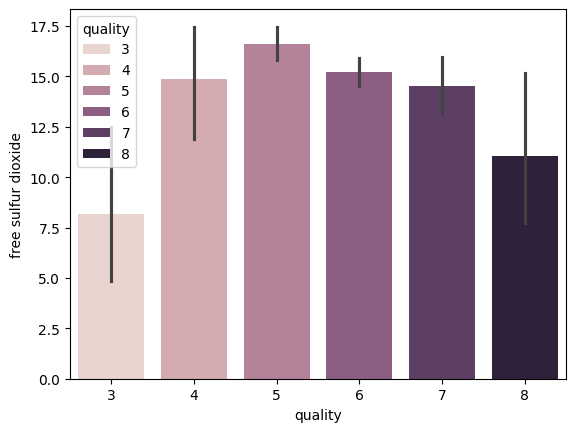

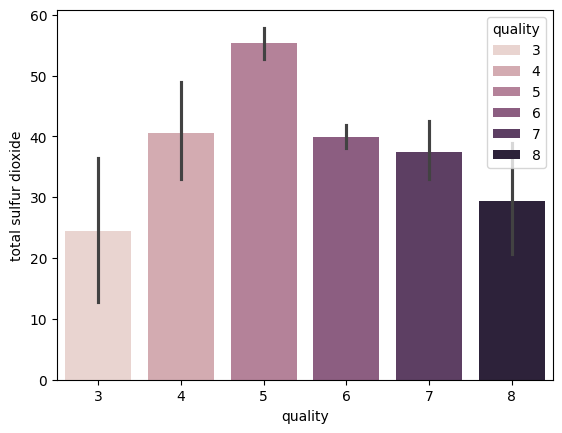

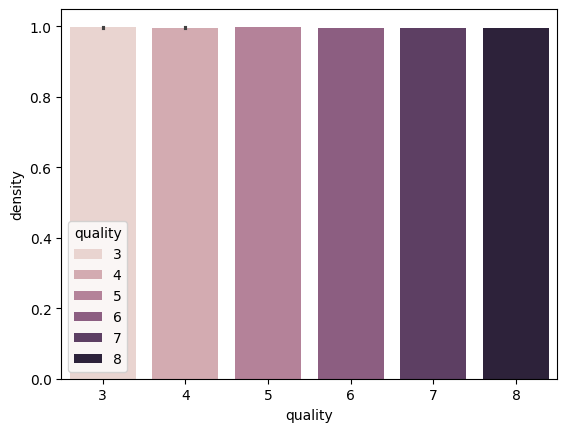

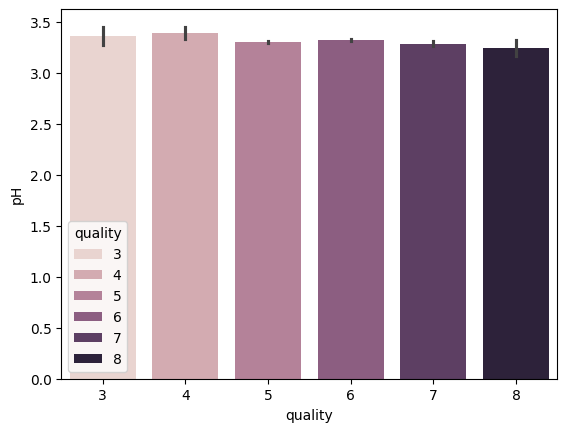

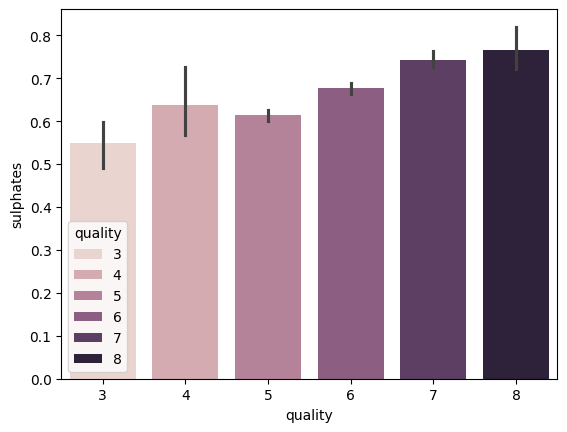

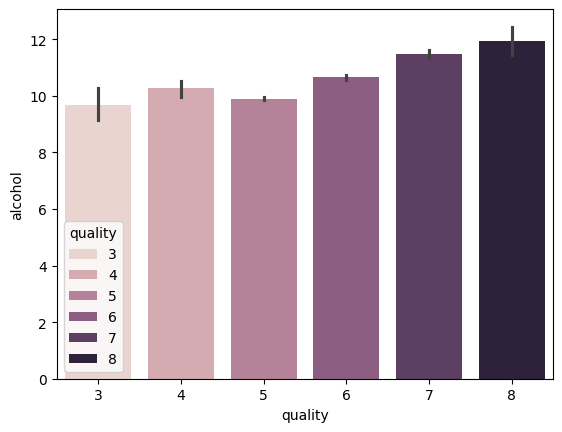

In [95]:
"""O objetivo é gerar um gráfico de barras (barplot) para cada coluna do DataFrame df_filtered, excluindo a coluna 'quality', e mostrar a relação entre 'quality' e cada uma dessas colunas."""

for col in df_filtered.drop(columns='quality').columns:

    sns.barplot(data=df, x='quality', y=col, hue='quality', errorbar=('ci', 90))
    plt.show()

In [96]:
df['quality_bin'] = df['quality'].apply(lambda x : "bom" if x > 5 else "ruim")

df_bin = df.drop(columns=['Id', 'quality'])
df_bin

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_bin
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,ruim
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,ruim
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,ruim
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,bom
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,ruim
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,bom
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,bom
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,ruim
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,bom


In [97]:
#salvar o dataframe sem sobescrever o original
df_bin.to_csv("winequality-binary.csv", index=False)

In [98]:
df_bin

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_bin
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,ruim
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,ruim
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,ruim
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,bom
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,ruim
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,bom
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,bom
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,ruim
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,bom


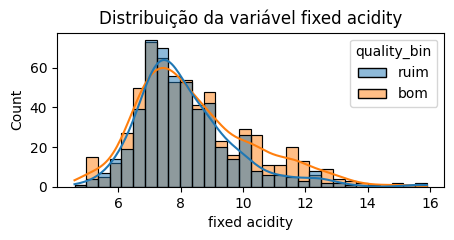

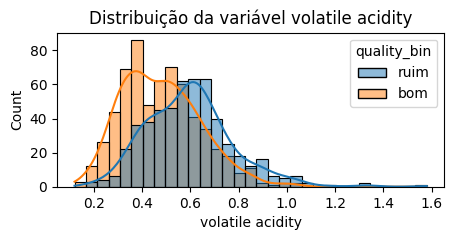

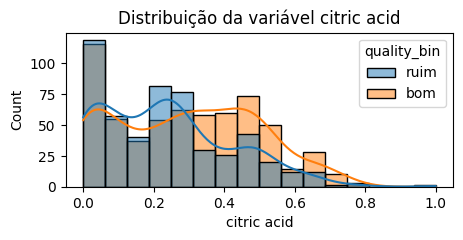

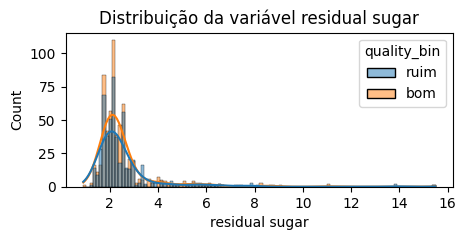

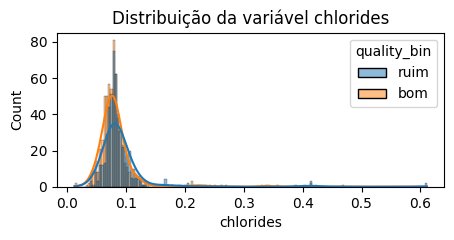

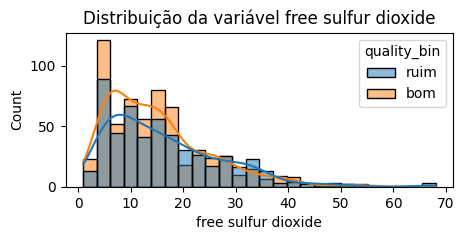

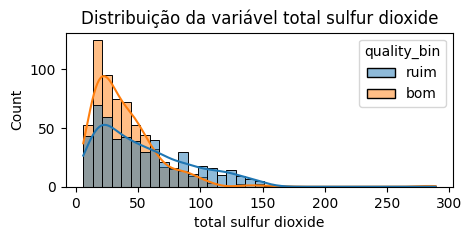

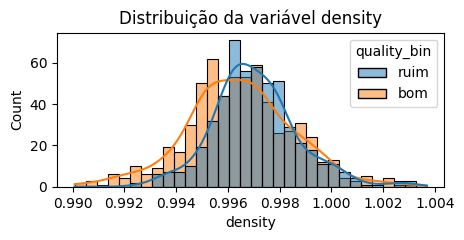

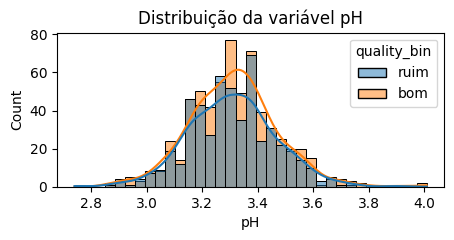

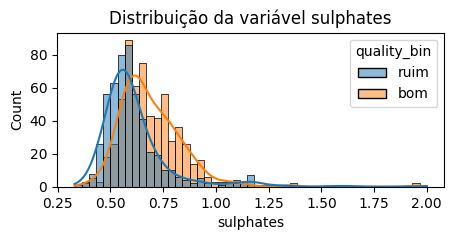

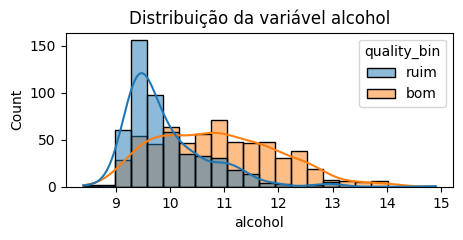

In [118]:
for col in df_bin.drop(columns="quality_bin"):
    plt.figure(figsize=(5, 2))
    sns.histplot(data=df_bin, x=col, kde=True, hue=df_bin["quality_bin"]).set_title(f"Distribuição da variável {col}")
    plt.show()

In [105]:
from scipy.stats import ttest_ind

Teste t para a variável alcohol: 

t-statistic: 16.569 

p-value: 0.000 





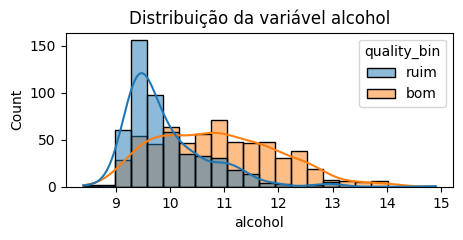


A variável alcohol é estatisticamente significativa para a qualidade do vinho

--------------------------------------------------------------------------------
Teste t para a variável sulphates: 

t-statistic: 8.138 

p-value: 0.000 





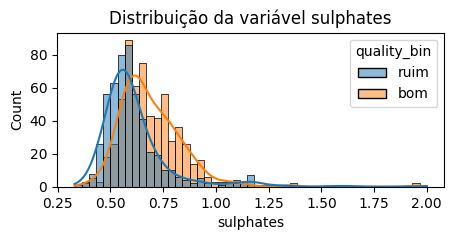


A variável sulphates é estatisticamente significativa para a qualidade do vinho

--------------------------------------------------------------------------------
Teste t para a variável volatile acidity: 

t-statistic: -11.840 

p-value: 0.000 





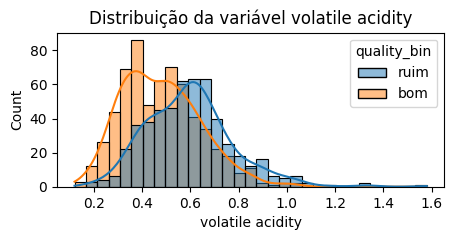


A variável volatile acidity é estatisticamente significativa para a qualidade do vinho

--------------------------------------------------------------------------------
Teste t para a variável citric acid: 

t-statistic: 5.305 

p-value: 0.000 





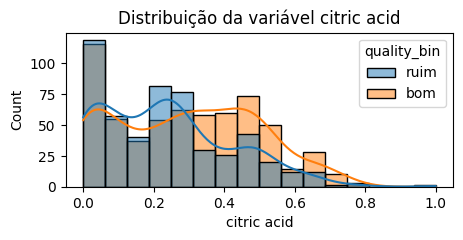


A variável citric acid é estatisticamente significativa para a qualidade do vinho

--------------------------------------------------------------------------------


In [119]:
bom = df_bin[df_bin["quality_bin"] == 'bom']
ruim = df_bin[df_bin["quality_bin"] == 'ruim']

df_bin_filtered = ["alcohol", "sulphates", "volatile acidity", "citric acid" ]

for col in df_bin_filtered:
    t_stat, p_val = ttest_ind(bom[col], ruim[col])

    print(f"Teste t para a variável {col}: \n")
    print(f"t-statistic: {t_stat:.3f} \n")
    print(f"p-value: {p_val:.3f} \n")
    print("\n")

    plt.figure(figsize=(5, 2)) 
    sns.histplot(data=df_bin, x=col, kde=True, hue=df_bin["quality_bin"]).set_title(f"Distribuição da variável {col}")
    plt.show()

    if p_val < 0.05:
        print(f"\nA variável {col} é estatisticamente significativa para a qualidade do vinho\n")
        print("-"*80)
    
    else:
        print(f"\nA variável {col} não é estatisticamente significativa para a qualidade do vinho\n")
        print("-"*80)
    

